In [1]:
# !pip install pandas seaborn scikit-learn

In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
## Loading data

In [6]:
df = pd.read_csv("../data/winequality.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


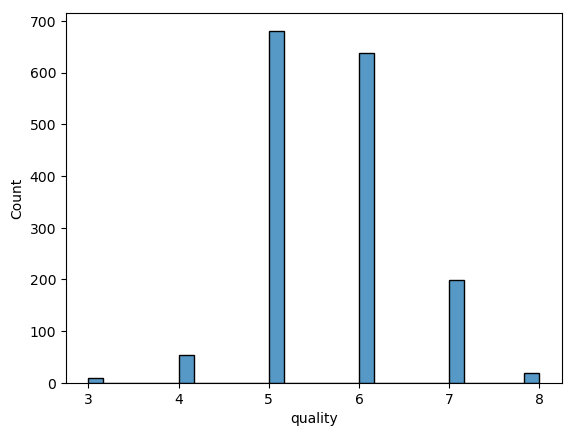

In [9]:
sns.histplot(df['quality'])

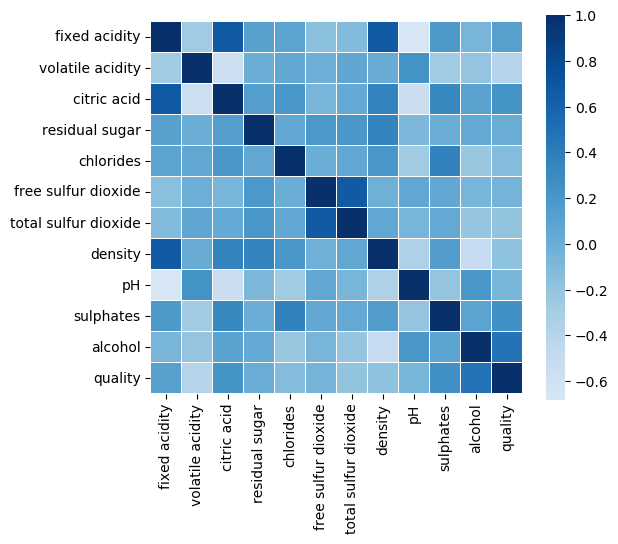

In [11]:
corr = df.corr()
f,ax = plt.subplots(figsize =(6,5))

sns.heatmap(corr, cmap = 'Blues', center = 0, square=True, linewidths=.5)

In [12]:
## Split data

In [13]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [15]:
X_train.shape

(1199, 11)

In [16]:
X_test.shape

(400, 11)

In [17]:
## Training

In [18]:
alpha = 0.5
l1 = 0.5

lr = ElasticNet(alpha = alpha, l1_ratio = l1)

In [19]:
lr.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [20]:
def eval_metrics(ground_truth, pred):
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

In [21]:
y_pred = lr.predict(X_test)

In [22]:
(rmse, mae, r2) = eval_metrics(y_test, y_pred)

In [24]:
print(f"Dataset: Test \nRMSE: {rmse} \nMAE: {mae} \n R2:{r2}")

Dataset: Test 
RMSE: 0.7526188072010005 
MAE: 0.6057644119964178 
 R2:0.124444638420795


In [ ]:
## Training with MLFlow 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

alpha = 0.5
l1 = 0.5

lr = ElasticNet(alpha = alpha, l1_ratio = l1)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

def eval_metrics(ground_truth, pred):
    rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
    mae = metrics.mean_absolute_error(ground_truth, pred)
    r2 = metrics.r2_score(ground_truth, pred)
    
    return rmse, mae, r2

(rmse, mae, r2) = eval_metrics(y_test, y_pred)

In [26]:
import mlflow

In [37]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

with mlflow.start_run():
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    


In [38]:
### add run name, create new artifact store, create a new experiment

In [39]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

current_name = "first custom run"


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    


In [40]:
## add exp name

In [43]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

current_name = "first custom run"
experiment_name = "Experiment-1"

# mlflow.create_experiment(experiment_name)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    


In [44]:
## add artifact store

In [47]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

current_name = "first custom run"
experiment_name = "Experiment-2"
artifact_store = "/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow/artifact_store"


mlflow.create_experiment(experiment_name, artifact_location=artifact_store)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    


In [45]:
pwd

'/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow'

In [48]:
### Store model

In [50]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

current_name = "first custom run"
experiment_name = "Experiment-2"
artifact_store = "/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow/artifact_store"


# mlflow.create_experiment(experiment_name, artifact_location=artifact_store)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    
    mlflow.sklearn.log_model(lr, "Linear regression model")


In [51]:
## log tags

In [52]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

current_name = "setting tags"
experiment_name = "Experiment-2"
artifact_store = "/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow/artifact_store"
custom_tags = {
    "created_by": "Developer1",
    "Experiment":"Trying regression model",
    "environment": "development"
}

# mlflow.create_experiment(experiment_name, artifact_location=artifact_store)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1", l1)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    
    mlflow.sklearn.log_model(lr, "Linear regression model")
    
    mlflow.set_tags(custom_tags)


In [53]:
## autologging

In [55]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

mlflow.autolog()

current_name = "logging model2"
experiment_name = "Experiment-3"
artifact_store = "/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow/artifact_store"
custom_tags = {
    "created_by": "Developer1",
    "Experiment":"Trying regression model",
    "environment": "development"
}

# mlflow.create_experiment(experiment_name, artifact_location=artifact_store)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
#     mlflow.log_param("alpha", alpha)
#     mlflow.log_param("l1", l1)
    
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mae", mae)
#     mlflow.log_metric("r2", r2)
    
#     mlflow.sklearn.log_model(lr, "Linear regression model")
    
    mlflow.set_tags(custom_tags)


2024/06/28 11:38:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [56]:
############ serving models

In [59]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import mlflow
from mlflow.models import infer_signature


df = pd.read_csv("../data/winequality.csv")

X = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

# --------------------------------------------------------------------------

mlflow.autolog()

current_name = "logging model3"
experiment_name = "Experiment-3"
artifact_store = "/Users/saumyagoyal/JupyterNotebook/MLCon/MLCon_24S/MLCon/1_MLFlow/artifact_store"
custom_tags = {
    "created_by": "Developer1",
    "Experiment":"Trying regression model",
    "environment": "development"
}

# mlflow.create_experiment(experiment_name, artifact_location=artifact_store)
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name=current_name):
    
    alpha = 0.5
    l1 = 0.01

    lr = ElasticNet(alpha = alpha, l1_ratio = l1)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    def eval_metrics(ground_truth, pred):
        rmse = np.sqrt(metrics.mean_squared_error(ground_truth, pred))
        mae = metrics.mean_absolute_error(ground_truth, pred)
        r2 = metrics.r2_score(ground_truth, pred)

        return rmse, mae, r2

    (rmse, mae, r2) = eval_metrics(y_test, y_pred)

    ## log parameter and metrics
    
#     mlflow.log_param("alpha", alpha)
#     mlflow.log_param("l1", l1)
    
#     mlflow.log_metric("rmse", rmse)
#     mlflow.log_metric("mae", mae)
#     mlflow.log_metric("r2", r2)
    
#     mlflow.sklearn.log_model(lr, "Linear regression model")

    signature = infer_signature(X_test, y_pred)
    
    mlflow.sklearn.log_model(
        sk_model = lr,
        artifact_path = "sklearn-model",
        signature = signature,
        registered_model_name = "sklearn-model-1"
    )
    
    mlflow.set_tags(custom_tags)


2024/06/28 11:48:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
Successfully registered model 'sklearn-model-1'.
Created version '1' of model 'sklearn-model-1'.


In [ ]:
curl -d '{"dataframe_split": {"columns": ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],
"data": [[7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8]]}}' \-H 'Content-Type: application/json' -X POST localhost:5002/invocations